In [91]:
# GET Data from CSV

import pandas as pd
import re

news = pd.read_csv('data.csv')
news['article_processed'] = news['article'].map(lambda x: re.sub('[,\.!?]', '', x))
news['article_processed'] = news['article_processed'].map(lambda x: x.lower())
news['article_processed'].head()

0    santa clara calif--(business wire)--intel labs...
1    santa clara calif--(business wire)--intel corp...
2    san francisco--(business wire)--at rsa confere...
Name: article_processed, dtype: object

In [92]:
# Individual WordCloud

for i in range(len(news['article_processed'])):
    long_string = ''.join(news['article_processed'][i])
    wordcloud = WordCloud(background_color="white", max_words=100, contour_width=3, contour_color='steelblue')
    wordcloud.generate(long_string)
    wordcloud.to_image().save('Img_' + str(i) + '.jpg', quality=100)

In [93]:
# Individual Freq Count

import nltk
import gensim
from nltk.corpus import stopwords
from gensim.utils import simple_preprocess
import gensim.corpora as corpora

stop_words = stopwords.words('english')
stop_words.extend(['from', 'as', 'is', 'on', 'use', 'santa', 'clara', 'calif', 'and', 'the', 'of', 'to', 'with', 'in', 'for'])

def to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def rm_stopwords(data):
    return [[word for word in simple_preprocess(str(text)) if word not in stop_words] for text in data]

individual_list, corpus_list, id2word_list = [], [], []

for i in range(len(news['article_processed'])):
    initial_data = news['article_processed'][i]
    individual_list.append(initial_data)
    word_data = list(to_words(individual_list))
    data_without_stopwords = rm_stopwords(word_data)

    print(data_without_stopwords[:1][0][:30])

    id2word = corpora.Dictionary(data_without_stopwords)
    text_data = data_without_stopwords
    corpus = [id2word.doc2bow(text) for text in text_data]

    print(corpus[:1][0][:30])
    corpus_list.append(corpus)
    id2word_list.append(id2word)
    individual_list.clear()

contents = zip(corpus_list, id2word_list)

['business', 'wire', 'intel', 'labs', 'announces', 'significant', 'advancement', 'integrated', 'photonics', 'research', 'next', 'frontier', 'increasing', 'communication', 'bandwidth', 'compute', 'silicon', 'data', 'centers', 'across', 'networks', 'latest', 'research', 'features', 'industry', 'leading', 'advancements', 'multiwavelength', 'integrated', 'optics']
[(0, 1), (1, 1), (2, 1), (3, 2), (4, 1), (5, 1), (6, 1), (7, 4), (8, 1), (9, 2), (10, 1), (11, 1), (12, 1), (13, 1), (14, 2), (15, 6), (16, 1), (17, 1), (18, 1), (19, 6), (20, 1), (21, 1), (22, 2), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]
['business', 'wire', 'intel', 'corporation', 'today', 'announced', 'april', 'miller', 'boise', 'appointed', 'executive', 'vice', 'president', 'chief', 'legal', 'officer', 'lead', 'intel', 'global', 'legal', 'trade', 'government', 'affairs', 'team', 'starting', 'july', 'miller', 'boise', 'succeeds', 'steven']
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (

In [94]:
# Individual LDA Model & Results

from pprint import pprint
import pyLDAvis.gensim_models
import pickle
import pyLDAvis

num_topics = 10
pyLDAvis.enable_notebook()
i = 0

for corpus, id2word in contents:
    lda_model = gensim.models.LdaMulticore(corpus=corpus, id2word=id2word, num_topics=num_topics)
    pprint(lda_model.print_topics())
    lda_data = lda_model[corpus]
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open('lda_data_' + str(i), 'wb') as lda_file:
        pickle.dump(LDAvis_prepared, lda_file)
    with open('lda_data_' + str(i), 'rb') as lda_file:
        LDAvis_prepared = pickle.load(lda_file)

    pyLDAvis.save_html(LDAvis_prepared, 'results_' + str(i) +'.html')

    LDAvis_prepared

    i += 1

[(0,
  '0.020*"intel" + 0.017*"silicon" + 0.015*"high" + 0.011*"technology" + '
  '0.011*"optical" + 0.010*"using" + 0.010*"data" + 0.010*"photonics" + '
  '0.009*"wavelength" + 0.009*"array"'),
 (1,
  '0.016*"intel" + 0.011*"high" + 0.009*"silicon" + 0.008*"photonics" + '
  '0.008*"optical" + 0.008*"bandwidth" + 0.008*"laser" + 0.007*"interconnect" '
  '+ 0.007*"wavelength" + 0.007*"technology"'),
 (2,
  '0.018*"intel" + 0.013*"high" + 0.012*"silicon" + 0.011*"wavelength" + '
  '0.009*"optical" + 0.008*"photonics" + 0.008*"technology" + '
  '0.008*"interconnect" + 0.007*"array" + 0.007*"volume"'),
 (3,
  '0.009*"intel" + 0.008*"high" + 0.007*"silicon" + 0.007*"wavelength" + '
  '0.006*"photonics" + 0.006*"optical" + 0.006*"bandwidth" + '
  '0.005*"technology" + 0.005*"interconnect" + 0.005*"data"'),
 (4,
  '0.014*"intel" + 0.010*"silicon" + 0.010*"wavelength" + 0.009*"optical" + '
  '0.008*"photonics" + 0.007*"compute" + 0.007*"technology" + 0.007*"high" + '
  '0.007*"bandwidth" + 0.0

c:\Users\cheekety\Workspace\sandbox\splunk-scraper\lib\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)


[(0,
  '0.033*"intel" + 0.019*"boise" + 0.016*"miller" + 0.016*"business" + '
  '0.015*"legal" + 0.014*"global" + 0.014*"team" + 0.014*"leadership" + '
  '0.012*"executive" + 0.010*"officer"'),
 (1,
  '0.040*"intel" + 0.025*"boise" + 0.024*"miller" + 0.019*"business" + '
  '0.017*"team" + 0.017*"legal" + 0.017*"global" + 0.014*"leadership" + '
  '0.014*"executive" + 0.011*"april"'),
 (2,
  '0.026*"intel" + 0.020*"boise" + 0.019*"miller" + 0.014*"team" + '
  '0.014*"business" + 0.014*"legal" + 0.012*"executive" + 0.012*"leadership" + '
  '0.010*"chief" + 0.010*"global"'),
 (3,
  '0.011*"intel" + 0.008*"boise" + 0.008*"miller" + 0.007*"legal" + '
  '0.007*"executive" + 0.007*"business" + 0.007*"leadership" + 0.007*"global" '
  '+ 0.006*"team" + 0.006*"chief"'),
 (4,
  '0.034*"intel" + 0.019*"boise" + 0.017*"miller" + 0.016*"executive" + '
  '0.015*"legal" + 0.015*"business" + 0.012*"leadership" + 0.012*"global" + '
  '0.012*"team" + 0.011*"april"'),
 (5,
  '0.014*"intel" + 0.011*"boise" 

c:\Users\cheekety\Workspace\sandbox\splunk-scraper\lib\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)


[(0,
  '0.041*"intel" + 0.023*"security" + 0.010*"based" + 0.009*"network" + '
  '0.008*"hardware" + 0.008*"help" + 0.007*"software" + 0.006*"challenges" + '
  '0.006*"capabilities" + 0.005*"protections"'),
 (1,
  '0.025*"intel" + 0.020*"security" + 0.008*"based" + 0.007*"network" + '
  '0.006*"hardware" + 0.006*"help" + 0.005*"data" + 0.005*"design" + '
  '0.005*"capabilities" + 0.005*"also"'),
 (2,
  '0.043*"intel" + 0.020*"security" + 0.010*"hardware" + 0.009*"based" + '
  '0.008*"network" + 0.008*"software" + 0.007*"help" + 0.007*"design" + '
  '0.006*"capabilities" + 0.006*"supply"'),
 (3,
  '0.028*"intel" + 0.019*"security" + 0.007*"based" + 0.007*"network" + '
  '0.006*"help" + 0.006*"software" + 0.006*"design" + 0.006*"hardware" + '
  '0.005*"also" + 0.005*"technology"'),
 (4,
  '0.039*"intel" + 0.024*"security" + 0.008*"based" + 0.008*"network" + '
  '0.007*"software" + 0.007*"hardware" + 0.006*"design" + 0.006*"technology" + '
  '0.006*"including" + 0.006*"data"'),
 (5,
  '0.

c:\Users\cheekety\Workspace\sandbox\splunk-scraper\lib\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)


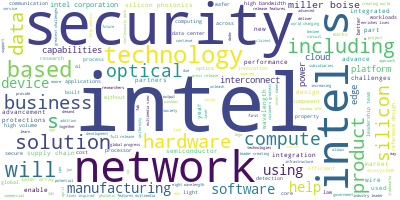

In [95]:
# OVERALL WordCloud

from wordcloud import WordCloud

long_string = ','.join(list(news['article_processed'].values))
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

In [106]:
# OVERALL Freq Count

import nltk
import gensim
from nltk.corpus import stopwords
from gensim.utils import simple_preprocess
import gensim.corpora as corpora

stop_words = stopwords.words('english')
stop_words.extend(['from', 'as', 'is', 'on', 'use', 'santa', 'clara', 'calif', 'and', 'the', 'of', 'to', 'with', 'in', 'for'])

def to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def rm_stopwords(data):
    return [[word for word in simple_preprocess(str(text)) if word not in stop_words] for text in data]

initial_data = news['article_processed'].values.tolist()
word_data = list(to_words(initial_data))
data_without_stopwords = rm_stopwords(word_data)

print(data_without_stopwords[:1][0][:30])

id2word = corpora.Dictionary(data_without_stopwords)
text_data = data_without_stopwords
corpus = [id2word.doc2bow(text) for text in text_data]

print(corpus[:1][0][:30])

['business', 'wire', 'intel', 'labs', 'announces', 'significant', 'advancement', 'integrated', 'photonics', 'research', 'next', 'frontier', 'increasing', 'communication', 'bandwidth', 'compute', 'silicon', 'data', 'centers', 'across', 'networks', 'latest', 'research', 'features', 'industry', 'leading', 'advancements', 'multiwavelength', 'integrated', 'optics']
[(0, 1), (1, 1), (2, 1), (3, 2), (4, 1), (5, 1), (6, 1), (7, 4), (8, 1), (9, 2), (10, 1), (11, 1), (12, 1), (13, 1), (14, 2), (15, 6), (16, 1), (17, 1), (18, 1), (19, 6), (20, 1), (21, 1), (22, 2), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


In [107]:
# OVERALL LDA Model

from pprint import pprint

num_topics = 10
lda_model = gensim.models.LdaMulticore(corpus=corpus, id2word=id2word, num_topics=num_topics)
pprint(lda_model.print_topics())
lda_data = lda_model[corpus]

[(0,
  '0.046*"intel" + 0.013*"security" + 0.008*"business" + 0.007*"boise" + '
  '0.007*"technology" + 0.007*"network" + 0.007*"miller" + 0.007*"data" + '
  '0.006*"based" + 0.006*"help"'),
 (1,
  '0.030*"intel" + 0.014*"security" + 0.009*"boise" + 0.008*"miller" + '
  '0.007*"business" + 0.007*"legal" + 0.006*"team" + 0.005*"based" + '
  '0.005*"technology" + 0.005*"network"'),
 (2,
  '0.034*"intel" + 0.024*"security" + 0.008*"network" + 0.008*"based" + '
  '0.007*"help" + 0.006*"hardware" + 0.006*"business" + 0.005*"data" + '
  '0.005*"software" + 0.005*"design"'),
 (3,
  '0.021*"intel" + 0.012*"security" + 0.005*"network" + 0.005*"technology" + '
  '0.005*"based" + 0.004*"help" + 0.004*"data" + 0.004*"design" + '
  '0.004*"silicon" + 0.004*"including"'),
 (4,
  '0.040*"intel" + 0.013*"security" + 0.008*"based" + 0.006*"network" + '
  '0.006*"hardware" + 0.005*"technology" + 0.005*"challenges" + '
  '0.005*"including" + 0.004*"design" + 0.004*"help"'),
 (5,
  '0.029*"intel" + 0.009*

In [118]:
# OVERALL Results

import pyLDAvis.gensim_models
import pickle
import pyLDAvis

pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
with open('lda_data_overall', 'wb') as lda_file:
    pickle.dump(LDAvis_prepared, lda_file)

with open('lda_data_overall', 'rb') as lda_file:
    LDAvis_prepared = pickle.load(lda_file)

pyLDAvis.save_html(LDAvis_prepared, 'results_overall.html')

LDAvis_prepared

c:\Users\cheekety\Workspace\sandbox\splunk-scraper\lib\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.021433  0.014842       1        1  68.041485
6     -0.039510  0.003428       2        1  31.817164
5     -0.016161  0.013756       3        1   0.017670
8     -0.009089  0.004974       4        1   0.017670
2      0.019156 -0.008652       5        1   0.017670
1      0.029482  0.004760       6        1   0.017669
4      0.011865 -0.005343       7        1   0.017669
7     -0.016513 -0.008999       8        1   0.017668
3      0.001218 -0.003311       9        1   0.017668
9     -0.001882 -0.015457      10        1   0.017667, topic_info=             Term       Freq      Total Category  logprob  loglift
162         intel  68.000000  68.000000  Default  30.0000  30.0000
756      security  18.000000  18.000000  Default  29.0000  29.0000
298    technology  11.000000  11.000000  Default  28.0000  28.0000
280       silicon  12.000000  12.000000  Default  27.0000  27.0000
30       business  11.000000  11.000000  Default  26.0000  26.0000
..            ...        ...        ...      ...      ...      ...
31   capabilities   0.000713   6.662852  Topic10  -6.0409  -0.5020
10           also   0.000710   6.583451  Topic10  -6.0442  -0.4933
317         using   0.000730   7.418498  Topic10  -6.0171  -0.5856
258       release   0.000669   5.628826  Topic10  -6.1037  -0.3961
237     photonics   0.000627   5.256642  Topic10  -6.1687  -0.3927

[696 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
442       1  0.898692  accelerating
448       1  0.927375    additional
5         1  0.774216       advance
5         2  0.193554       advance
7         1  0.270719   advancement
...     ...       ...           ...
828       1  0.668907       without
828       2  0.334453       without
331       1  0.782731         world
331       2  0.195683         world
438       1  0.913547          year

[453 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 7, 6, 9, 3, 2, 5, 8, 4, 10])